# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
# YOUR CODE HERE
X, y = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8, random_state=1)

In [4]:
y.shape

(1200,)

❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

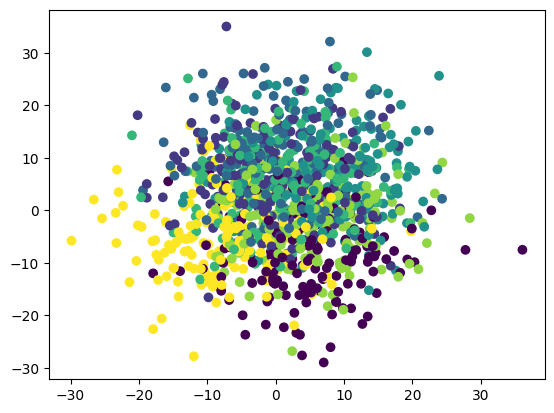

In [31]:
# YOUR CODE HERE
plt.scatter(X[:,1], X[:,5], c=y)


❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

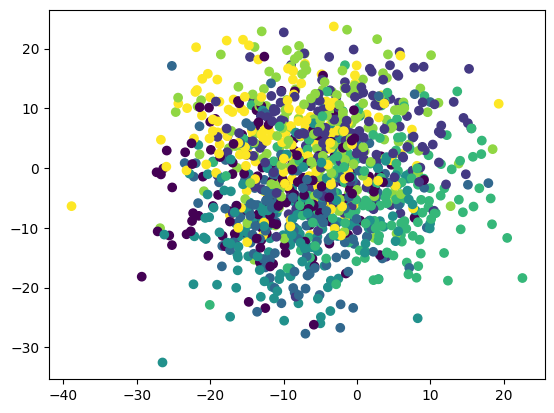

In [32]:
# YOUR CODE HERE
plt.scatter(X[:,2], X[:,3], c=y)

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [39]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
# YOUR CODE HERE
y_cat = to_categorical(y)

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [52]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, train_size=0.7)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [53]:
# YOUR CODE HERE
std = StandardScaler()
std.fit(X_train, y_train)

StandardScaler()

In [51]:
X_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [54]:
X_train_scaled = std.transform(X_train)

In [57]:
X_test_scaled = std.transform(X_test)
# y_train_scaled = std.transform(y_train)
# y_test_scaled = std.transform(y_test)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [56]:
from tensorflow.keras import Sequential, layers

In [61]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = Sequential()
    model.add(layers.Dense(50, input_dim=8, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [62]:
# YOUR CODE HERE
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                450       
                                                                 
 dense_3 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [85]:
# YOUR CODE HERE
history = model.fit(X_train_scaled, y_train, batch_size=16, epochs=50)

Epoch 1/50
53/53 [==============================] - 0s 2ms/step - loss: 1.3759 - accuracy: 0.5214
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 1.2192 - accuracy: 0.6774
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 1.1285 - accuracy: 0.7131
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 1.0598 - accuracy: 0.7274
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 1.0042 - accuracy: 0.7345
Epoch 6/50
53/53 [==============================] - 0s 2ms/step - loss: 0.9582 - accuracy: 0.7357
Epoch 7/50
53/53 [==============================] - 0s 2ms/step - loss: 0.9213 - accuracy: 0.7393
Epoch 8/50
53/53 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.7321
Epoch 9/50
53/53 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.7286
Epoch 10/50
53/53 [==============================] - 0s 3ms/step - loss: 0.8412 - accuracy: 0.7345
Epoch 11/50
53/53 [

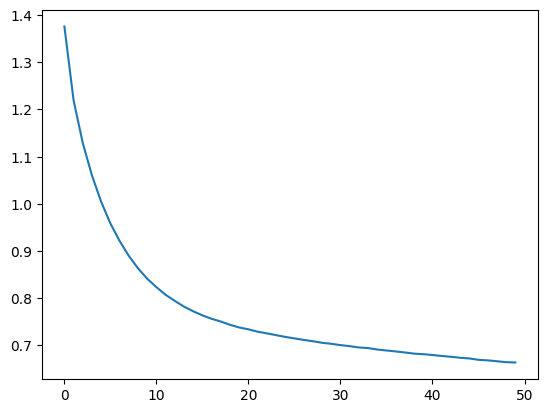

In [86]:
plt.plot(history.history['loss'])

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [87]:
# YOUR CODE HERE
evaluation = model.evaluate(X_test_scaled, y_test)
evaluation

12/12 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.6694


[0.8673366904258728, 0.6694444417953491]

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [77]:
accuracy_baseline = 1/7
accuracy_baseline

0.14285714285714285

🧪 **Test your code**

In [78]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/pp085ster/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/pp085ster/code/pablopussell/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-multiclass-classification/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



In [79]:
!git add tests/baseline.pickle

!git commit -m 'Completed baseline step'

!git push origin master

[master c851373] Completed baseline step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/baseline.pickle
Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 8 threads
Compressing objects: 100% (12/12), done.
Writing objects: 100% (13/13), 5.61 KiB | 1.87 MiB/s, done.
Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
To github.com:pablopussell/data-multiclass-classification.git
 * [new branch]      master -> master


❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [88]:
# YOUR CODE HERE
model = initialize_model()
history = model.fit(X_train_scaled, y_train, batch_size=16, epochs=1000)

Epoch 1/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.8325 - accuracy: 0.2226
Epoch 2/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.5203 - accuracy: 0.4905
Epoch 3/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.2965 - accuracy: 0.6048
Epoch 4/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.1319 - accuracy: 0.6607
Epoch 5/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0160 - accuracy: 0.6833
Epoch 6/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.9374 - accuracy: 0.7036
Epoch 7/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.8867 - accuracy: 0.7060
Epoch 8/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.8511 - accuracy: 0.7119
Epoch 9/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.8263 - accuracy: 0.7119
Epoch 10/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.8084 - accuracy: 0.7155

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

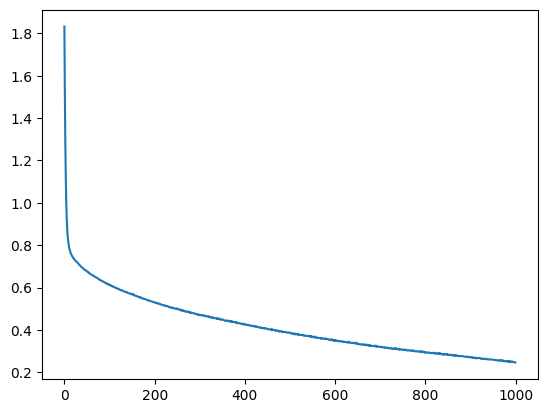

In [92]:
# YOUR CODE HERE
plt.plot(history.history['loss'])

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

Overfitting

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

In [94]:
model = initialize_model()

history = model.fit(X_train_scaled, 
                    y_train, 
                    validation_data = (X_test_scaled, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

NameError: name 'plot_history' is not defined

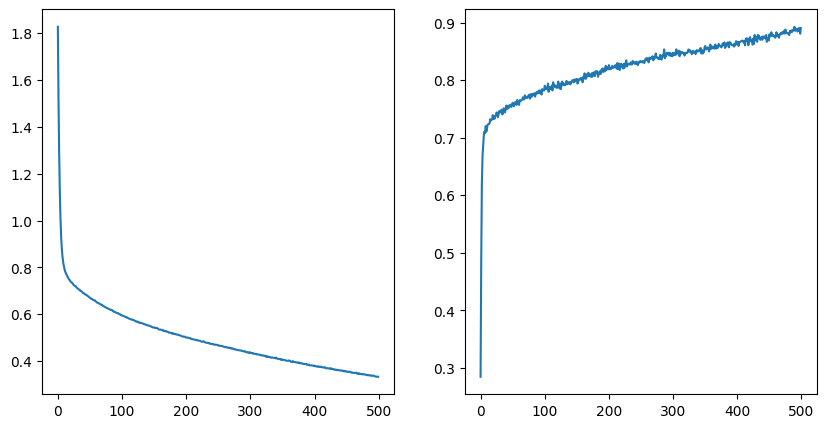

In [102]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [103]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

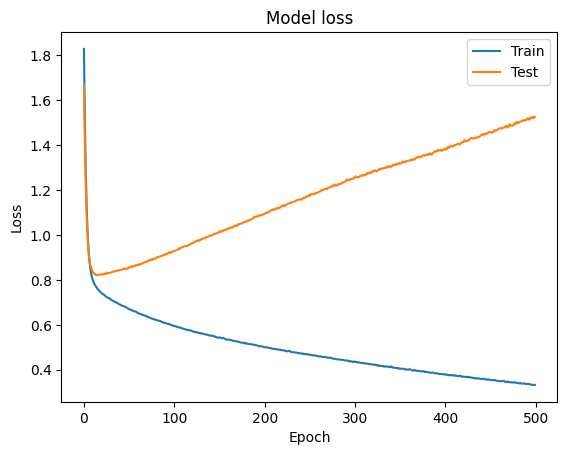

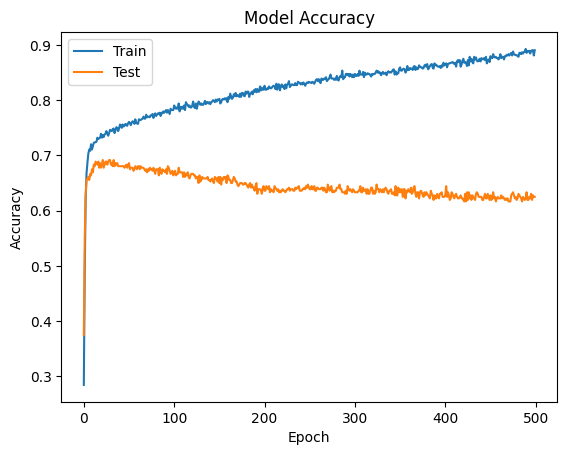

In [106]:
# YOUR CODE HERE
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!